   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

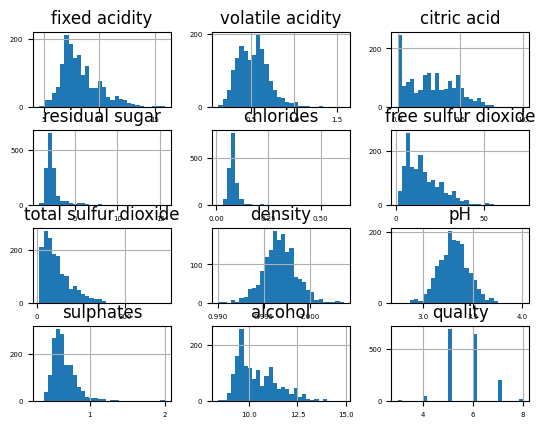

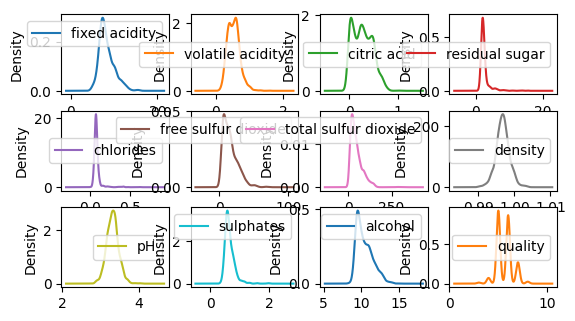

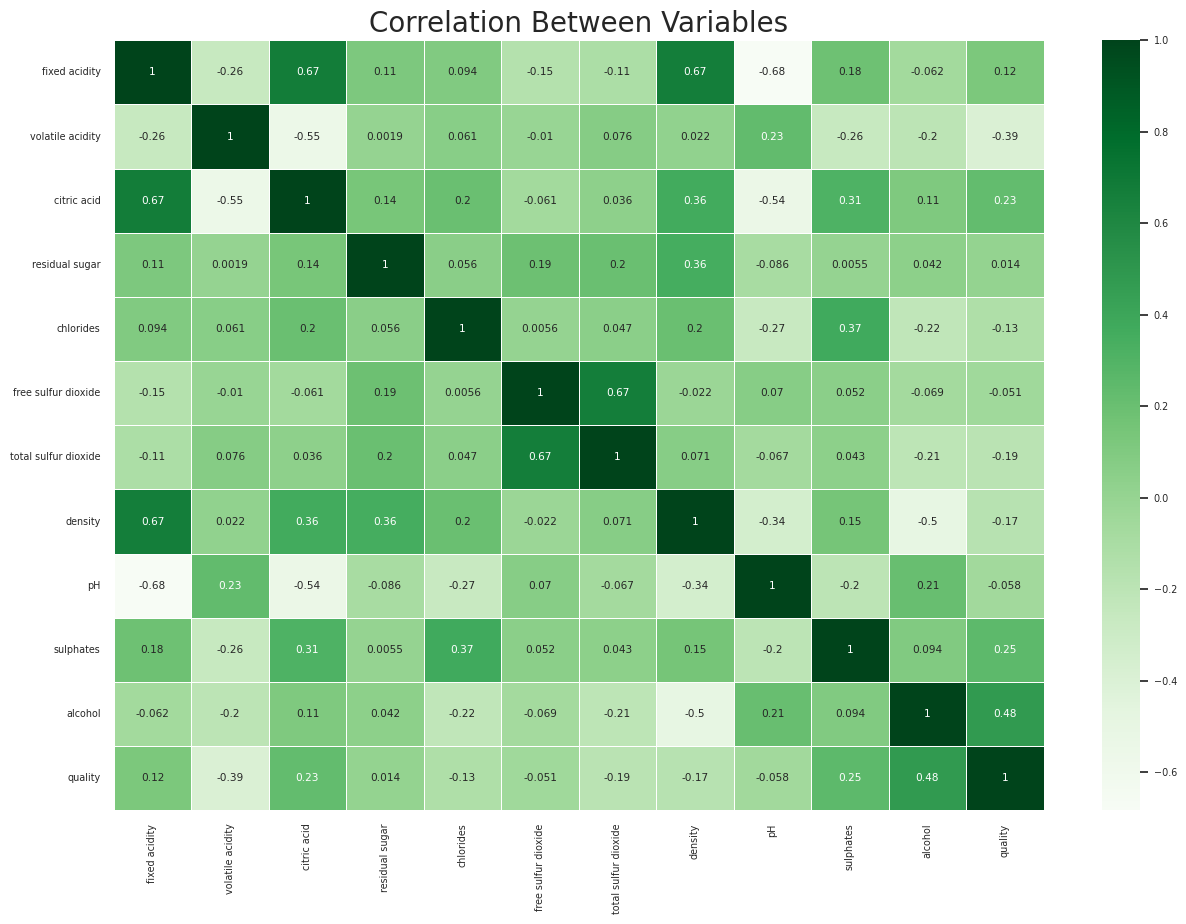

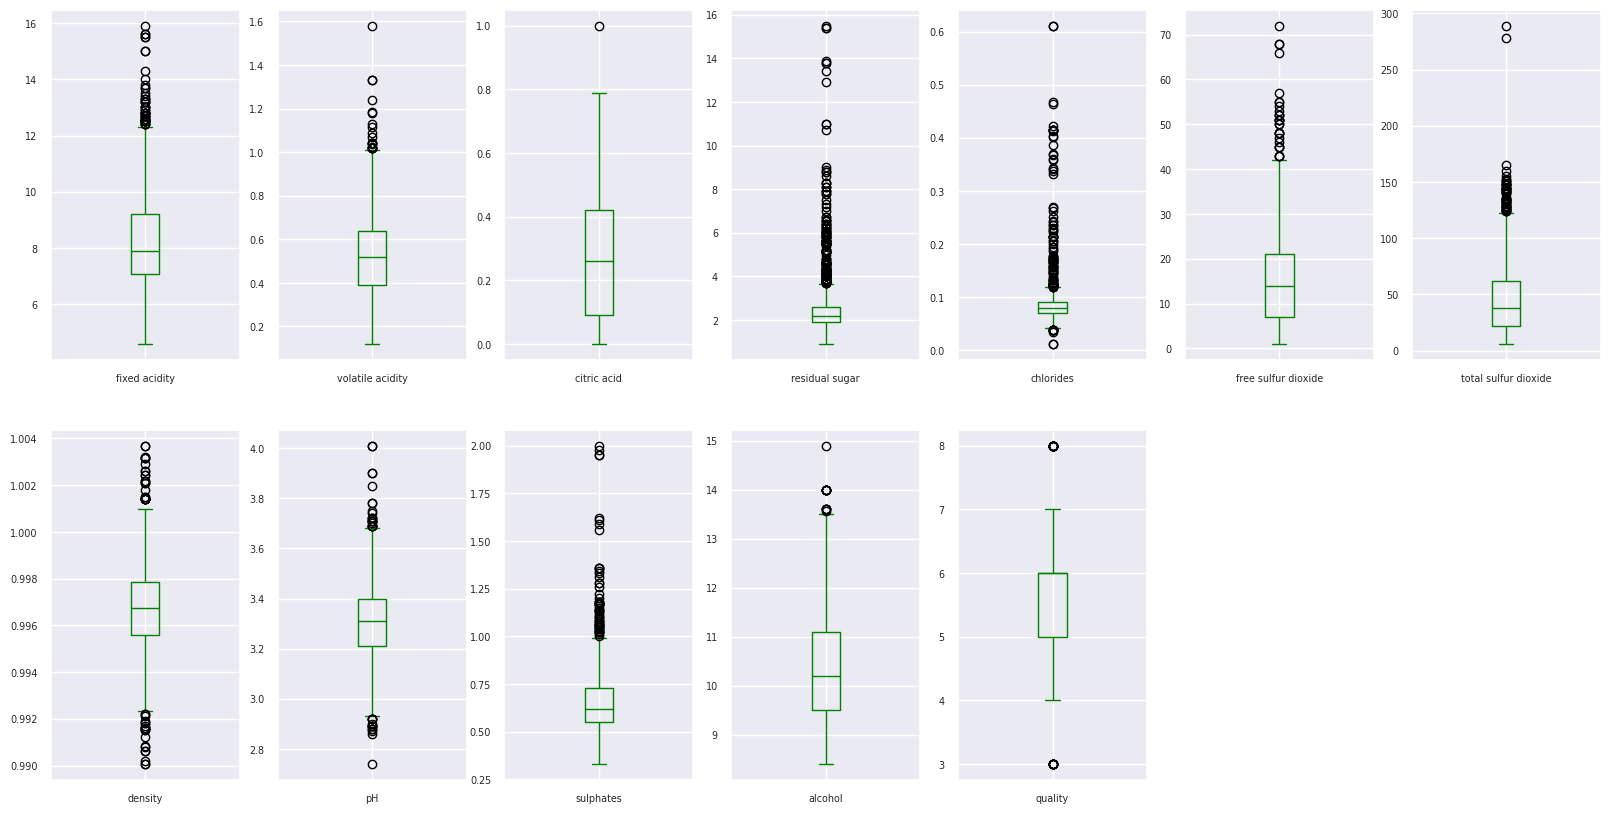

(1279, 11) (320, 11)
Performance on Training set
DT: 0.588771 (0.026105)

NB: 0.536345 (0.023217)

SVM: 0.498866 (0.028117)

GBM: 0.648159 (0.015704)

RF: 0.674770 (0.017990)

ABC: 0.541078 (0.024866)

ETC: 0.679449 (0.014366)



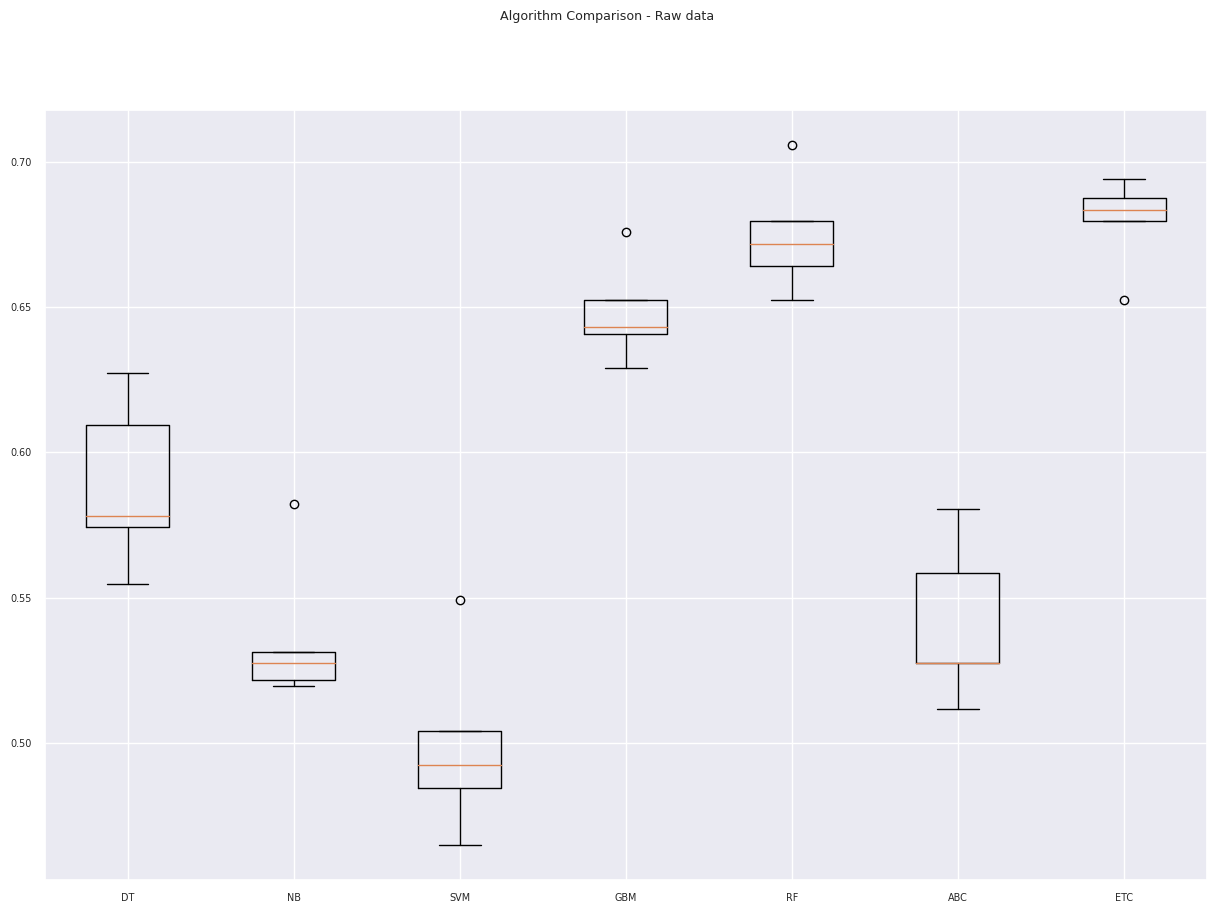

Performance on Training set
DT: 0.587978 (0.019165)

NB: 0.541029 (0.026539)

SVM: 0.600472 (0.011318)

GBM: 0.653652 (0.016166)

RF: 0.673983 (0.017764)

ABC: 0.541078 (0.024866)

ETC: 0.683355 (0.011354)



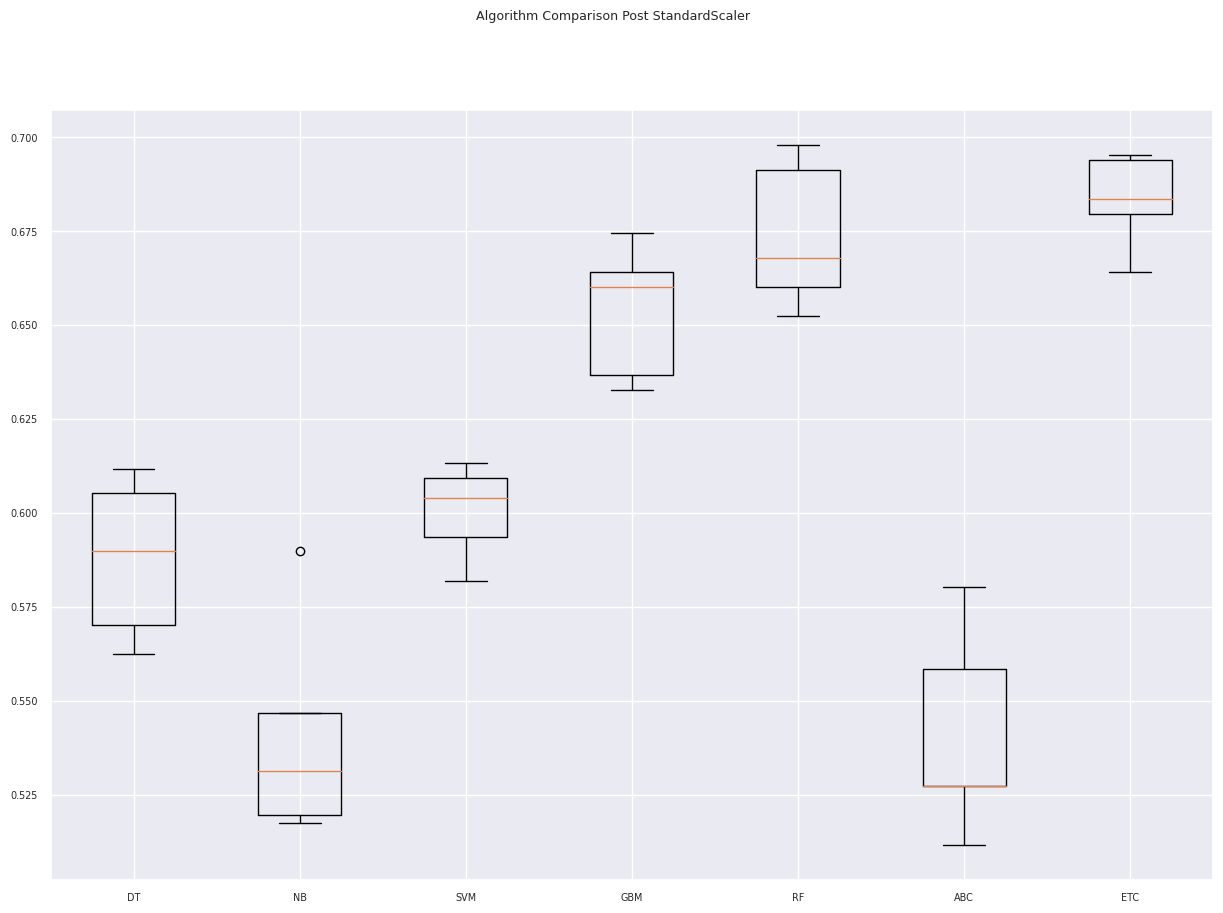

In [2]:
# Capstone Model Development
# Load libraries
import matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

fileLocation = '/content/drive/MyDrive/Colab Notebooks/CapstoneWines/winequality-red.csv'
df = read_csv(fileLocation, header=[0])

print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.nunique())
print(df.info())
print(df.groupby(['quality']).size())

# Visualising data  distribution in detail
df.hist(sharex=False, sharey=False, xlabelsize=5, ylabelsize=5, bins=30)
plt.show()

# show density plot
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, legend=True)
plt.show()

# Correlation matrix
sbn.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sbn.set(font_scale=0.63)
sbn.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Greens")
plt.title('Correlation Between Variables', fontsize = 20)
plt.show()

# generate box plots
df.plot(kind='box', subplots=True,
        layout=(2,7), sharex=False, sharey=False, figsize=(20, 10), color='green');
plt.show()


# Converting the data to be suitable for model development
# by separating the inputs and the quality output
array = df.values
X = array[:,0:11].astype(float)
Y = array[:,11]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# confirm subsets after splitting
print(np.shape(X_train), np.shape(X_test))

# Baseline evaluation metric is accuracy score during model development
num_folds = 5
seed = 7
scoring = 'accuracy'

# Set up of algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

# Use a Box plot to compare the Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Raw data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# now add the StandardScaler to improve the performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# now try the models again to evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

# Use a Box plot to compare the Algorithms' Performance after StandardScaler applied
fig = plt.figure()
fig.suptitle('Algorithm Comparison Post StandardScaler')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


###############  Need to classify as "good" and other wines - say use better than upper Quartile Q3, top 25%

In [3]:
name = []
for name, model in models:
  model.fit(X_train, Y_train)
  print(name, str(model.score(X_test, Y_test)))

DT 0.553125
NB 0.53125
SVM 0.65
GBM 0.625
RF 0.634375
ABC 0.5625
ETC 0.690625


In [4]:
#identify the outliers
# define continuous variables
continuous_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        # Calculate the outliers using the 1.5 * IQR where IQR is the difference between the bottom 25 and top 75 Quartiles
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continuous_features])



For the feature fixed acidity, No of Outliers is 49
For the feature volatile acidity, No of Outliers is 19
For the feature citric acid, No of Outliers is 1
For the feature residual sugar, No of Outliers is 155
For the feature chlorides, No of Outliers is 112
For the feature free sulfur dioxide, No of Outliers is 30
For the feature total sulfur dioxide, No of Outliers is 55
For the feature density, No of Outliers is 45
For the feature pH, No of Outliers is 35
For the feature sulphates, No of Outliers is 59
For the feature alcohol, No of Outliers is 13


In [5]:
#drop the outliers
outliers(df[continous_features], drop = True)


Outliers from fixed acidity feature removed
Outliers from volatile acidity feature removed
Outliers from citric acid feature removed
Outliers from residual sugar feature removed
Outliers from chlorides feature removed
Outliers from free sulfur dioxide feature removed
Outliers from total sulfur dioxide feature removed
Outliers from density feature removed
Outliers from pH feature removed
Outliers from sulphates feature removed
Outliers from alcohol feature removed


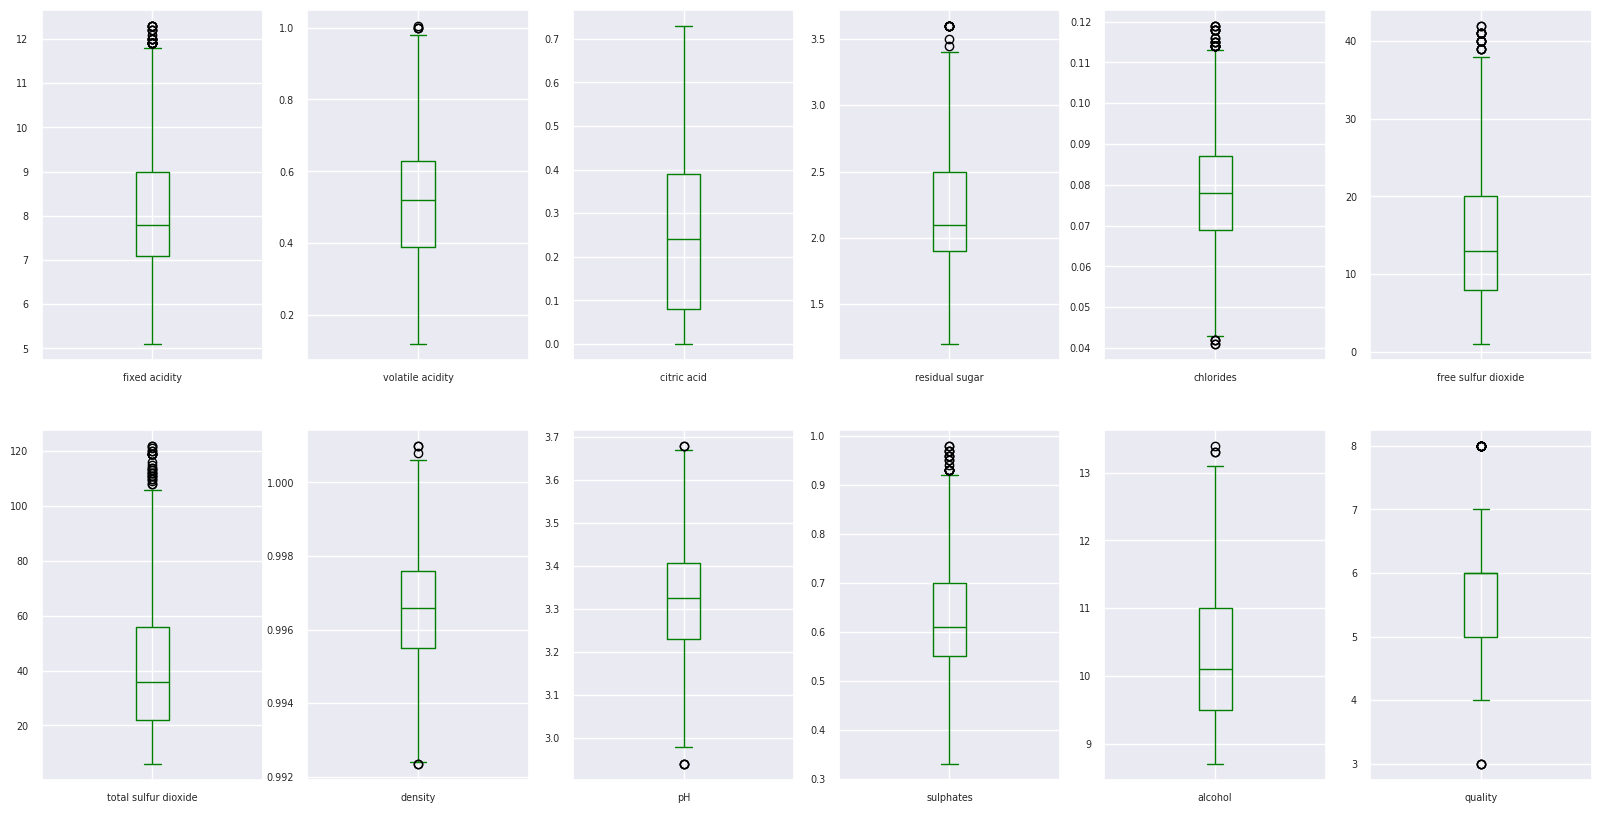

In [6]:
#check if outliers got removed
df.plot(kind='box', subplots=True, 
        layout=(2,6),sharex=False,sharey=False, figsize=(20, 10), color='green');


In [7]:
df.shape

(1194, 12)

Performance on Training set after outlier removal
DT: 0.588759 (0.015038)
 0.553125
NB: 0.541029 (0.026539)
 0.53125
SVM: 0.600472 (0.011318)
 0.65
GBM: 0.646596 (0.015402)
 0.625
RF: 0.665392 (0.030536)
 0.634375
ABC: 0.541078 (0.024866)
 0.5625
ETC: 0.673974 (0.013882)
 0.690625


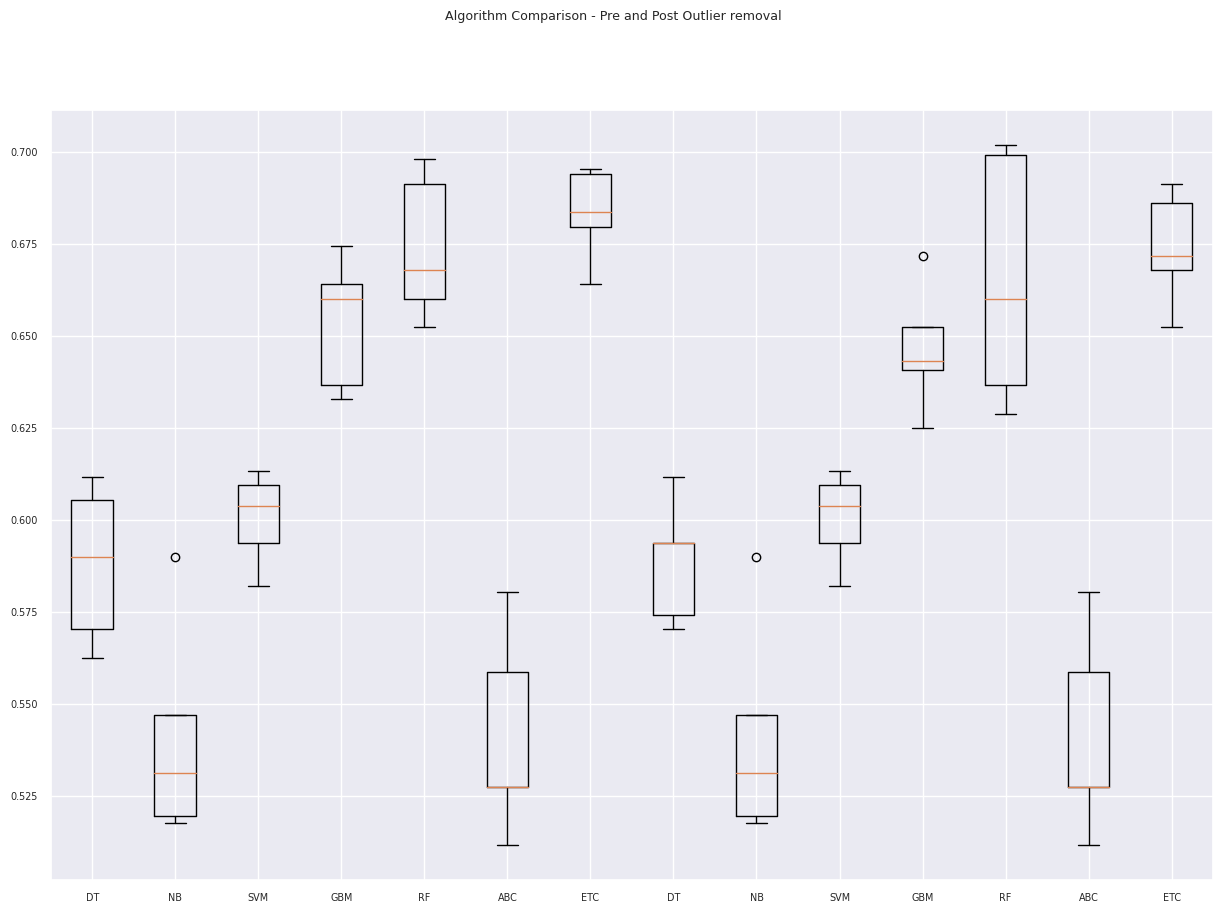

In [8]:
print("Performance on Training set after outlier removal")
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg, str(model.score(X_test, Y_test)))

# Use a Box plot to compare the Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Pre and Post Outlier removal')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import pickle

model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
print(str(model.score(X_test, Y_test)))

pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/CapstoneWines/winequality_predictor.h5', 'wb'))


0.703125


In [17]:
from traitlets.config import loader
#reload model to confirm it is working
with open('/content/drive/MyDrive/Colab Notebooks/CapstoneWines/winequality_predictor.h5', 'rb') as file:
  loaded_model = pickle.load(file)
#validate median and standard deviation of test data
print(str(loaded_model.score(X_test, Y_test)))


0.703125


In [19]:
# reload file from github and make sure it works
! apt-get install git
! git clone https://github.com/farruge/ST1Capstone.git

from traitlets.config import loader
#reload model to confirm it is working
with open('/content/ST1Capstone/winequality_predictor.h5', 'rb') as file:
  loaded_model = pickle.load(file)
#validate median and standard deviation of test data
print(str(loaded_model.score(X_test, Y_test)))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Cloning into 'ST1Capstone'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 3.52 MiB | 2.38 MiB/s, done.
0.703125
